In [1]:
import warnings

warnings.filterwarnings("ignore")

# 蛋白质功能与结构设计简介
*Copyright (c) 2022 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.*

蛋白质是生物体中重要的结构和功能分子，它们通过组装氨基酸形成长链，并通过氨基酸链的空间结构来实现特定的功能。蛋白质的空间结构指的是氨基酸链在三维空间中的构型。这种构型可以通过X射线衍射、核磁共振或其它方法测定。研究表明，蛋白质的空间结构与其功能密切相关。例如，酶作为一类重要的蛋白质，其空间结构决定了其与底物的相互作用，从而实现了化学反应的催化作用。此外，蛋白质的空间结构还可以通过改变氨基酸序列来控制其功能。

蛋白质在不同的折叠方式下会产生不同的空间结构，因此研究蛋白质折叠对于研究蛋白质功能有重要意义。由于蛋白质的结构和功能问题具有高度的复杂性和非线性性，目前用经典计算求解蛋白质折叠问题的效率很低。量子计算可以通过量子力学原理来快速求解复杂的非线性优化问题，普遍认为将会在未来对蛋白质折叠方面的研究起到极大的帮助。

## 利用量子计算方法模拟蛋白质折叠过程
### 晶格模型
在蛋白质结构研究中，一种常用的方法是晶格模型\[1\]，它将蛋白质中的氨基酸链划分为一系列晶格单元，每个晶格单元包括若干个氨基酸。通过对晶格单元之间相互作用的分析，我们可以推测出蛋白质的空间结构。晶格模型可以帮助我们更好地理解蛋白质的结构与功能，为药物设计和治疗疾病提供重要的理论依据。
![](lattice_model_demo.jpg)

In [3]:
from paddle_quantum.biocomputing import Protein

protein = Protein("APRLRFY")
print(protein)

Protein with 7 nodes and 6 edges


利用 `paddle_quantum` 的 `biocomputing` 模块， 我们可以很容易地完成一个蛋白质的构建，上面的代码就构造了一个包含7个氨基酸的氨基酸链。

从晶格模型出发，我们可以根据格点之间的相互作用得到一个蛋白质的哈密顿量\[2\]，我们可以基于这个哈密顿量构造变分量子算法（VQE）来求解蛋白质分子的稳定结构（能量最低时的结构）。

In [4]:
# 其中 lambda0 和 lambda1 是蛋白质哈密顿量中的两个参数，用于约束蛋白质的空间结构。
h = protein.get_protein_hamiltonian(lambda0=10.0, lambda1=10.0)
print(h)

327.0085 I
-47.5 Z1, Z3
65.0 Z1, Z5
-50.0 Z1, Z7
52.5 Z1, Z9
-47.5 Z0, Z2
65.0 Z0, Z4
-50.0 Z0, Z6
52.5 Z0, Z8
-47.5 Z0, Z1, Z2, Z3
65.0 Z0, Z1, Z4, Z5
-50.0 Z0, Z1, Z6, Z7
52.5 Z0, Z1, Z8, Z9
-65.0 Z3, Z5
92.5 Z3, Z7
-60.0 Z3, Z9
-65.0 Z2, Z4
92.5 Z2, Z6
-60.0 Z2, Z8
-65.0 Z2, Z3, Z4, Z5
92.5 Z2, Z3, Z6, Z7
-60.0 Z2, Z3, Z8, Z9
-72.5 Z5, Z7
92.5 Z5, Z9
-72.5 Z4, Z6
92.5 Z4, Z8
-72.5 Z4, Z5, Z6, Z7
92.5 Z4, Z5, Z8, Z9
-65.0 Z7, Z9
-65.0 Z6, Z8
-65.0 Z6, Z7, Z8, Z9
-157.168 Z12
30.0 Z1, Z3, Z12
-40.0 Z1, Z5, Z12
30.0 Z1, Z7, Z12
-27.5 Z1, Z9, Z12
30.0 Z0, Z2, Z12
-40.0 Z0, Z4, Z12
30.0 Z0, Z6, Z12
-27.5 Z0, Z8, Z12
30.0 Z0, Z1, Z2, Z3, Z12
-40.0 Z0, Z1, Z4, Z5, Z12
30.0 Z0, Z1, Z6, Z7, Z12
-27.5 Z0, Z1, Z8, Z9, Z12
37.5 Z3, Z5, Z12
-52.5 Z3, Z7, Z12
30.0 Z3, Z9, Z12
37.5 Z2, Z4, Z12
-52.5 Z2, Z6, Z12
30.0 Z2, Z8, Z12
37.5 Z2, Z3, Z4, Z5, Z12
-52.5 Z2, Z3, Z6, Z7, Z12
30.0 Z2, Z3, Z8, Z9, Z12
37.5 Z5, Z7, Z12
-40.0 Z5, Z9, Z12
37.5 Z4, Z6, Z12
-40.0 Z4, Z8, Z12
37.5 Z4, Z5, Z6, Z7, Z12
-

### 变分量子线路
用户可以使用变分量子算法（VQE）来解决蛋白质折叠问题。这个问题中的变分量子线路如下。

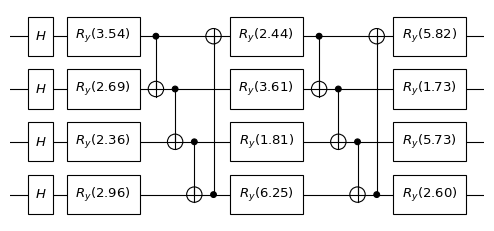

In [5]:
from folding_protein import circuit

# 下面的代码搭建了一个宽度为4，包含两个线路单元的参数化量子线路（注：一个线路单元包含一层RY和一层CNOT）。
cir = circuit(4, 2)
cir.plot()

## 如何使用
用户可以通过编辑配置文件config.toml对任务进行自定义，其中用户可以设置的参数如下
```toml
# The configuration file for protein folding problem

# The amino acides consists in protein. 
amino_acids = ["A", "P", "R", "L", "R", "F", "Y"]
# Pair of indices indicates the potentially interact amino acide pair.
possible_contactions = [[0, 5], [1, 6]]
# Depth of the quantum circuit used in VQE
depth = 1
# Number of VQE iterations
num_iterations = 200
# The condition for VQE convergence
tol = 1e-3
# The number of steps between two consecutive loss records
save_every = 10
# learning rate for the optimizer
learning_rate = 0.5
```
用户可以在命令行中运行
```shell
python folding_protein.py --config config.toml
```
来得到上面氨基酸序列在空间中折叠的三维结构，程序会自动保存这个空间结构的图片。

![](APRLRFY_3d_structure.jpg)


## 参考文献
\[1\] Pande, Vijay S., and Daniel S. Rokhsar. "Folding pathway of a lattice model for proteins." Proceedings of the National Academy of Sciences 96.4 (1999): 1273-1278.

\[2\] Robert, Anton, et al. "Resource-efficient quantum algorithm for protein folding." npj Quantum Information 7.1 (2021): 1-5.